# Gradient Descent for Linear Regression

- We are coding the Linear Regression implementation using Gradient Descent
- Loss function used is Meaan Squared Error
- Here we have 2 implementations of Gradient Descent method

    1. We will differentiate the MSELoss and use the derivate function formula of the loss function to perform Gradient Descent.

    2. We will use the autograd engine of pytorch to calculate the derivative of MSELoss w.r.t. weights and in turn perfoem the Gradient Descent.

# Approach 1: Finding the derivative of MSE Loss using formula

- We know that predictions are calculated as below for linear regression
    - $\hat{y} = {w1}{x1} + {w2}{x2} + {.....} + {wnxn} + {w0}$

    Where
    -  ${x1},{x2}.....{xn}$ are the features or independent variables.
    - ${w1},{w2}......{wn}$ are the corresponding weights for each feature / variable.




- We can write the same equation in Linear Algebra form as below:

    -  $\hat{y} = {X}@{W.T}$

    `PYTHON CODE`
    ```python
     preds = X@W.T
     ```

    Where

    - ${X}$ is the feature vector, rathher a matrix where each row is a new record and each column is a feature.


    - ${W}$ is the weight vector $[{w0},{w1},{w2},....{wn}]$


- Coming to the loss function for Linear Regression, we will be using the Mean Squared Error Loss


    - MSE = $\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$


- In Gradient Descent we need to reduce the loss w.r.t. to variable which in our case is the weights parameter

- Derivative of Loss w.r.t. weight is as below:

    - MSE derivative = $\frac{-2}{n} \Sigma_{i=1}^n({yi}-\hat{yi})({xi})$

- Again the derivative can be wriiten in the linear algerbra form as below:
    - gradient = ${-2}/{N} ({y} - \hat{y}){.T}@({X})$
   
   `PYTHON CODE`
    ```python
     -2/len(x_new) * ((labels - preds).T @ X)
     ```

### Using the formulas above we will now code our first approach i.e. using the gradient formula to perform Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple

GradientDesc = namedtuple('GradDesc',('loss_df','coef_','intercept_'))


def gradient_descent(x,labels, lr = 0.01, iters = 200):
    x_new = np.insert(x,0,1, axis = 1)
    labels = labels.reshape(-1,1)
    # calculating the predictions
    # y = m1x1 + m2x2 + m3x3 + .......+ mnxn +c = 0
    w = np.random.randn(1,x.shape[1] + 1)
    out_df = pd.DataFrame(columns= ['weights', 'loss'])
    for i in range(iters):
        preds = x_new@w.T
        # calculating the MSE Loss
        cost = np.mean(((preds - labels)**2))
        gradient = -2/len(x_new) * ((labels - preds).T @ x_new)
        w -= lr * gradient
        # out_df.loc[i, 'weights'] = w
        out_df.loc[i] = [w,cost]
    return GradientDesc(out_df, w[0][1:],w[0][0])

### Great!!

### We are done with the code lets see how it works

In [35]:
# Let's get some dataset to test it on

from sklearn.datasets import load_diabetes

data = load_diabetes()

X = data['data']
y = data['target']
cols =  data['feature_names']

# Let's have it in a dataframe format

df = pd.DataFrame(X, columns = cols)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


-  We see that all features are numerical.
- Also looks like the data is scaled.

#### Without delaying much lets apply the Gradient Descent algorithm to see how well it performs

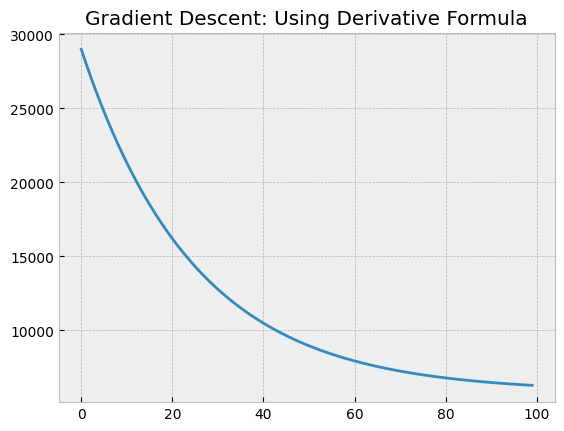

In [42]:
plt.style.use('bmh')
out_formula = gradient_descent(X,y.reshape(1,-1),iters=100, lr = 0.01)
out_formula.loss_df['loss'].plot()
plt.title('Gradient Descent: Using Derivative Formula')
plt.show()

##### Nice!! we see a loss curve that is reducing over time indicating that we are gradually able too reach to our minima function for the Loss Function

# Approach 2: Finding the derivative of MSE Loss using pytorch

- Now in the above approach we saw a lot of derivations to reach the formula for MSE derivative.

- However, it would be great if someone could handle the derivative calculation without us doing the maths.

- Enter **PYTORCH**

- We will leverage the pytorch autograd engine to leverage the derivative calculation.

In [37]:
import torch

def gradient_descent_torch(x,labels, lr = 0.01, iters = 200):
    x_new = torch.tensor(np.insert(x,0,1, axis = 1), dtype=torch.float32)
    labels = torch.tensor(labels).reshape(-1,1)
    # calculating the predictions
    # y = m1x1 + m2x2 + m3x3 + .......+ mnxn +c = 0
    w = torch.nn.Parameter(torch.randn(1,x.shape[1] + 1))
    out_df = pd.DataFrame(columns= ['weights', 'loss'])
    for i in range(iters):
        preds = torch.matmul(x_new,w.T)
        # calculating the MSE loss
        loss = (preds - labels).pow(2).mean()
        # del loss/ del weights
        loss.backward()
        with torch.no_grad():
            w -= lr * w.grad
        # setting gradients zero to avoid gradient accumulation
        w.grad.zero_()
        out_df.loc[i] = [w.detach().tolist(),loss.item()]
    w = w.detach().tolist()
    return GradientDesc(out_df, w[0][1:],w[0][0])

#### Great!! Now let's test it

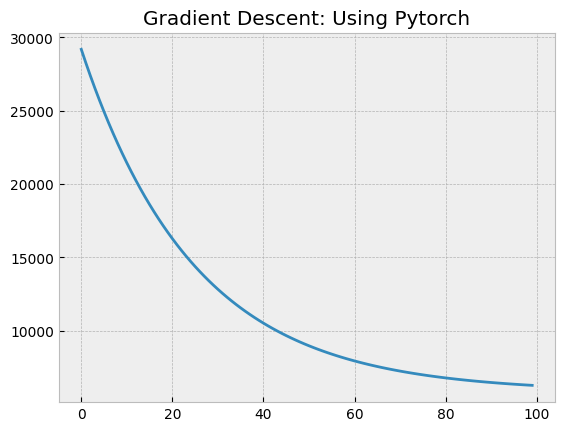

In [41]:
out_pytorch = gradient_descent_torch(X,y, iters= 100, lr = 0.01)
out_pytorch.loss_df['loss'].plot()
plt.title('Gradient Descent: Using Pytorch')
plt.show()

##### Nice!! Here as well we see a reducing curve without all the calculations.

### Let's compare the curve of the 2 approaches in a single plot

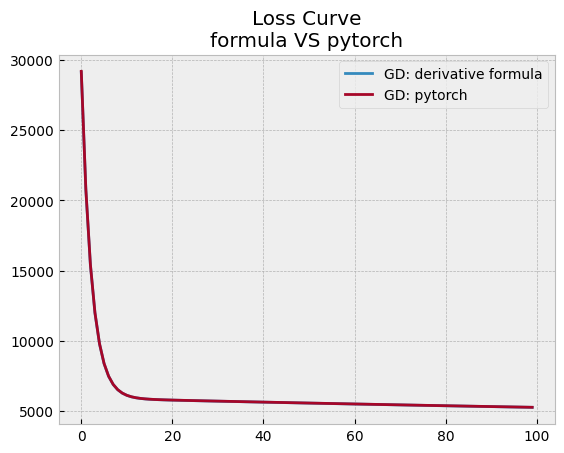

In [39]:
out_formula.loss_df['loss'].plot()
out_pytorch.loss_df['loss'].plot()
plt.title('Loss Curve\nformula VS pytorch')
plt.legend(['GD: derivative formula', 'GD: pytorch'])
plt.show()

### WOW!!

- Both are similar.
- However that may not be the case always.
- Our weight initializations are random in both methods and can lead to different results also.
- Also, we can try the same for different values of iters and learning rate

In [33]:
ITERS=1000
lr = 0.01

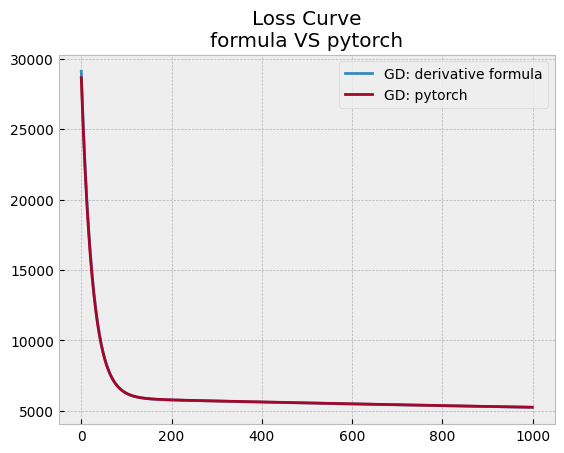

In [34]:
out_formula = gradient_descent(X,y,lr = lr, iters= ITERS)
out_pytorch = gradient_descent_torch(X,y, lr = lr, iters = ITERS)
out_formula.loss_df['loss'].plot()
out_pytorch.loss_df['loss'].plot()
plt.title('Loss Curve\nformula VS pytorch')
plt.legend(['GD: derivative formula', 'GD: pytorch'])
plt.show()

#### Here as well the curves are overlapping. **GOOD TO SEE**


#### Finally lets see what parameters have both the methods learnt

In [9]:
print('Gradient Descent: Using derivative Formula')
print(f" Coefficients : {out_formula.coef_},\nIntercept : {out_formula.intercept_}")

print('\n\nGradient Descent: Using pytorch')
print(f" Coefficients : {out_pytorch.coef_},\nIntercept : {out_pytorch.intercept_}")

Gradient Descent: Using derivative Formula
 Coefficients : [ 13.14332884   1.69418501  41.2325399   30.54191167  12.56067353
  10.41949729 -25.68985128  30.36944955  39.77038993  26.37670966],
Intercept : 152.13348390472748


Gradient Descent: Using pytorch
 Coefficients : [12.027775764465332, 1.747306227684021, 38.892913818359375, 28.62113380432129, 13.837334632873535, 11.68243408203125, -27.192827224731445, 28.963184356689453, 38.0931510925293, 26.648366928100586],
Intercept : 152.13311767578125
